<a href="https://colab.research.google.com/github/PamelaMorsentti/PamelaMorsentti/blob/main/01_regresion_logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión Logistica en dataset `blobs` y `moons` de `scikit-learn`

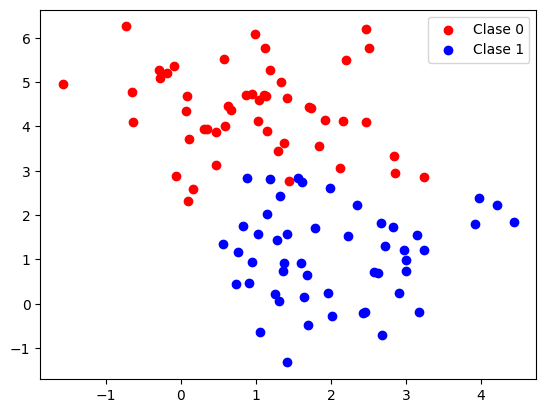

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=0)

clase_0 = (y==0)
plt.scatter(X[clase_0,0], X[clase_0,1], c='r', label="Clase 0")
plt.scatter(X[~clase_0,0], X[~clase_0,1], c='b', label="Clase 1")
plt.legend();

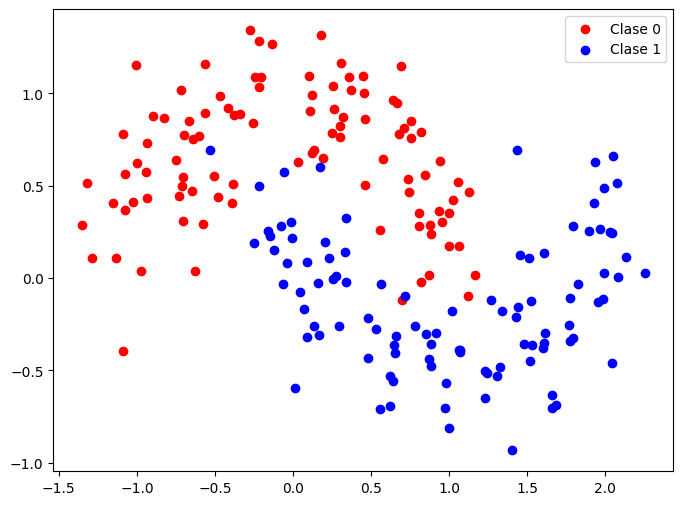

In [ ]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.2, random_state=0)
plt.figure(figsize=(8,6), dpi=100)
clase_0 = (y==0)
plt.scatter(X[clase_0,0], X[clase_0,1], c='r', label="Clase 0")
plt.scatter(X[~clase_0,0], X[~clase_0,1], c='b', label="Clase 1")
plt.legend();

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0)
model.fit(X, y)

LogisticRegression(random_state=0)

In [ ]:
#X_input = np.array([[4,3]])
y_pred = model.predict(X)
print(y_pred)

[0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 1 0 0 1 1
 1 0 0 1 0 0 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0
 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 0 0 0 1 0 0
 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 1
 0 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 1
 0 0 1 0 0 0 0 1 1 0 0 1 1 0 1]


In [ ]:
y

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1])

In [ ]:
model.predict_proba(X_input)

array([[0.40668941, 0.59331059]])

## Reporte de clasificación
Ver [este enlace](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-report) para más información sobre qué significan las métricas que calcula.
![](https://www.researchgate.net/publication/336402347/figure/fig3/AS:812472659349505@1570719985505/Calculation-of-Precision-Recall-and-Accuracy-in-the-confusion-matrix.ppm)
$$ F_1 = 2 \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}} $$

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84       100
           1       0.83      0.86      0.84       100

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200



In [ ]:
xmin, ymin = np.min(X, axis=0)
xmax, ymax = np.max(X, axis=0)
xx = np.linspace(xmin-0.5, xmax+0.5, 100)
yy = np.linspace(ymin-0.5, ymax+0.5, 100)
gx, gy = np.meshgrid(xx, yy)
grilla = np.array([gx.ravel(), gy.ravel()]).T
Z = model.predict_proba(grilla)[:,0].reshape(gx.shape)

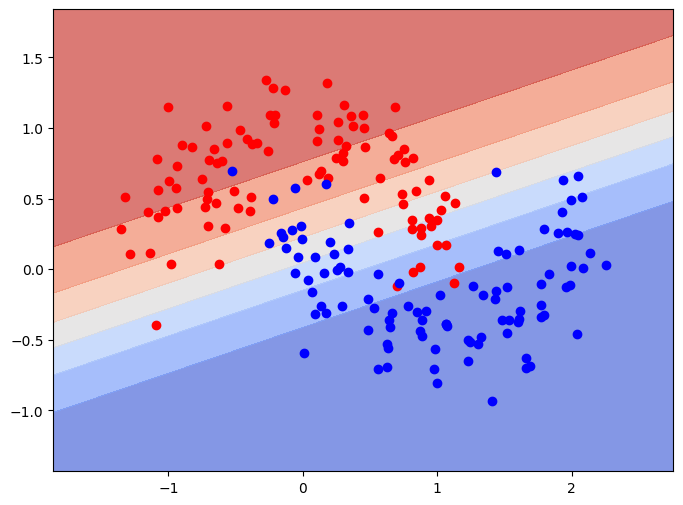

In [ ]:
plt.figure(figsize=(8,6), dpi=100)
plt.contourf(gx, gy, Z, cmap=plt.cm.coolwarm, alpha=0.7);
plt.scatter(X[clase_0,0], X[clase_0,1], c='r', label="Clase 0")
plt.scatter(X[~clase_0,0], X[~clase_0,1], c='b', label="Clase 1");